<a href="https://colab.research.google.com/github/lucasfmartins/Criminalidade-SP/blob/main/analiseCriminalidadeSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Criminalidade em São Paulo

<center><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/saopaulo_skyline.png"></center>


<center><img src="sp.png"></center>




## Contextualização do Problema

A criminalidade é um problema bastante recorrente no Brasil. Buscamos sempre formas de diminuir esses índices e usando técnicas de **Ciências de Dados** conseguimos entender melhor o que está acontecendo e gerar *insights* que direcionem ações capazes de diminuir os índices de criminalidade no país.

## Obtenção dos Dados

Os dados utilizados nesse projeto estão disponíveis [neste link](https://www.kaggle.com/danlessa/geospatial-sao-paulo-crime-database) e são referentes a crimes ocorridos na cidade de São Paulo, de 2010-2018.

Dados como esses podem ser obtidos diretamente das secretarias de cada estado. Entretanto, a vantagem desses que utilizaremos é que já foi feito um processo de limpeza neles, o que facilita nosso trabalho na hora de explorá-los.

>Serão utilizados dados não-oficiais da criminalidade. Mas sim de uma plataforma colaborativa, ***Onde Fui Roubado.***


##  

Aqui, utilizaremos a biblioteca `Pandas`, que nos permite trabalhar com arquivos csv com mais facilidade, em um formato tabular, que lembra as tabelas do Excel.

`Matplotlib` e `Seaborn` são bibliotecas gráficas que utilizaremos para plotar visualizações.

`Numpy` é uma das bibliotecas mais utilizadas em Data Science, e nos dá suporte para trabalharmos com arrays multidimensionais, matrizes, etc.

In [10]:
#Import os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#definindo o estilo dos graficos
sns.set_style()

Com as bibliotecas carregadas, carregaremos nossos dados para começar as analises necessárias

In [11]:
#carregando dados
df = pd.read_csv('https://www.dropbox.com/s/ghgb8xggbhgyuk3/dataset-limpo.csv?dl=1', parse_dates=['time'])

#transformando a coluna 'time' em datetime, e definindo como índice do dataframe
df.index = pd.to_datetime(df['time'], infer_datetime_format=True)

#verificando as primeiras entradas (tail(n) informa os ultimos n registros
df.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,titulo,uri,user_id,valor_prejuizo,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,0,6,Entraram na minha casa e ficaram por 2h30,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,NaN,60.0,NaN,True,True,NaN,True,NaN,True,True,NaN,True,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,1,1,Rádio do Carro Furtado,/denuncias/z6nRrz-radio-do-carro-furtado,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,1,1,Rádio do carro furtado no estacionamento PAGO ...,/denuncias/V9lNKa-radio-do-carro-furtado-no-es...,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,0,5,Quebraram a janela do meu carro,/denuncias/a4NB1e-quebraram-a-janela-do-meu-carro,NaN,2500.0,NaN,True,True,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,1,1,Arrombaram meu carro que estava no estacioname...,/denuncias/zD1lJa-arrombaram-meu-carro-que-est...,NaN,9999.0,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00


### **Dicionário de Variáveis**

De acordo com a fonte dos dados, essa é a descrição de cada uma das variáveis presentes no dataset.

* `id` - Número de identificação da ocorrência
* `bairro` - Bairro onde ocorreu o crime
* `created_at` - Data de criação da ocorrência
* `descricao` - Descrição da ocorrência
* `endereco` - Endereço da ocorrência
* `id.1` - Desconhecido
* `ip_address_origin` -  Endereço de IP de quem criou o registro
* `latitude` - Latitude da ocorrência
* `longitude` - Longitude da ocorrência
* `registrou_bo` - Indica se a vítima registrou boletim de ocorrência
* `sexo` - Sexo da vítima
* `tipo_assalto_id` - Tipo de assalto
* `titulo` - Título da ocorrência
* `uri` - URI do incidente
* `user_id` - ID do usuário
* `valor_prejuizo` - Valor do prejuízo em reais

A partir daqui, temos variáveis que tem como valor True (1) e NaN (Nulo). Mais a frente vamos tratar essas variáveis.

Quando assinalado sim, significa que o item foi roubado. Caso seja NaN, significa que não foi levado.
* `Bicicleta`
* `Bolsa ou Mochila`
* `Carteira`
* `Cartão de Crédito`
* `Celular`
* `Computador`
* `DVD`
* `Dinheiro`
* `Documentos`
* `Equipamento de Som`
* `Estepe`
* `MP4 ou Ipod`
* `Móveis`
* `Notebook`
* `Outros`
* `Relógio`
* `Som`
* `Tablet`
* `Tv`


* `time` - Data e horário do incidente

In [13]:
#Conhecendo o conjunto de dados

#Verificando as dimensões
print('Variáveis: ', df.shape[1])
print('Entradas: ', df.shape[0])

Variáveis:  36
Entradas:  12899


Usando a função `info()` podemos verificar algumas informações sobre nosso conjunto de dados, como:

* Quantidade de Colunas
* Visualizar as colunas
* Quantidade de entradas não nulas
* O tipo de cada variável

In [14]:
# verificando as informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-12-20 20:30:00 to 2012-03-02 09:44:00
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  12899 non-null  int64         
 1   bairro              11196 non-null  object        
 2   created_at          12899 non-null  object        
 3   descricao           12898 non-null  object        
 4   endereco            12899 non-null  object        
 5   id.1                12899 non-null  int64         
 6   ip_address_origin   11705 non-null  object        
 7   latitude            12899 non-null  float64       
 8   longitude           12899 non-null  float64       
 9   registrou_bo        12375 non-null  object        
 10  sexo                12899 non-null  int64         
 11  tipo_assalto_id     12899 non-null  int64         
 12  titulo              12899 non-null  object        
 13  uri        

A partir da função `describe()` podemos ver a distribuição estatística das variáveis. Tiramos informações como:

* `count` - Contagem de entradas válidas para cada variável
* `mean` - Média aritmética dos valores da variável
* `std` - Desvio padrão
* `min` - Menor valor existente para a variável
* `25%` - Primeiro quartil
* `50%` - Mediana
* `75%` - Terceiro quartil
* `max` - Maior valor existente para a variável

No nosso caso, temos muitas variáveis numéricas representando categorias com números, e as informações precisam ser acessadas de outra forma. Entretanto, podemos olhar a variável `valor_prejuizo` e tirar alguns insights, como:

* A média de de prejuízo causado pelos crimes é de 2.745,26 reais. 
* O maior prejuízo registrado foi de 1.000.000,00 (Um milhão) de reais.
* O desvio padrão é de 11.115,12 reais, o que indica alta variação. Sabendo que o primeiro quartil está em 25 reais, sugere que há *outliers* nesse dataset, elevando a média e o desvio padrão.
* O valor mínimo ser zero pode causar estranhamento a princípio, mas nem todos os crimes registrados irão causar prejuízo.



In [19]:
# distribuição estatística da coluna valor_prejuizo
df['valor_prejuizo'].describe()

count      12899.000000
mean        2745.264592
std        11115.126241
min            0.000000
25%           25.000000
50%          700.000000
75%         2000.000000
max      1000000.000000
Name: valor_prejuizo, dtype: float64

In [20]:
# distribuição estatística das variáveis numéricas
df.describe()

,id,id.1,latitude,longitude,sexo,tipo_assalto_id,user_id,valor_prejuizo
count,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,1166.000000,12899.000000
mean,45901.500194,45901.500194,-23.566805,-46.636817,0.612528,3.230483,16920.901372,2745.264592
std,24974.232979,24974.232979,0.366295,0.439810,0.487192,2.831739,5056.911119,11115.126241
min,21.000000,21.000000,-26.473037,-52.173376,0.000000,1.000000,1900.000000,0.000000
25%,25176.500000,25176.500000,-23.607056,-46.696776,0.000000,2.000000,13039.500000,25.000000
50%,44565.000000,44565.000000,-23.567079,-46.648535,1.000000,2.000000,16914.500000,700.000000
75%,68446.500000,68446.500000,-23.541510,-46.606492,1.000000,3.000000,21038.250000,2000.000000
max,88573.000000,88573.000000,-0.013911,0.004533,1.000000,11.000000,25802.000000,1000000.000000


É possível, também, verificarmos a distribuição estatística das variáveis categóricas. Para isso, basta passarmos o argumento `include='O'` (Letra "O"), para que ele busque as variáveis categóricas.

Aqui, receberemos outras respostas, como:
* `count` - Contagem de entradas válidas para a variável
* `unique` - Quantidade de entradas únicas
* `top` - Entrada mais comum
* `freq` - Frequência em que a entrada mais comum ocorre

Podemos então tirar algumas informações, como:

* Foram regristrados crimes em 1577 diferentes bairros
* A maioria das pessoas registrou boletim de ocorrência
* O título mais comum para registro de crime foi "*Fui assaltado voltando do trabalho*", o que diz muito sobre a situação da segurança pública na cidade.
* O objeto mais roubado são os **celulares**


In [21]:
#distribuição estatística das variáveis categóricas

df.describe(include='O')

,bairro,created_at,descricao,endereco,ip_address_origin,registrou_bo,titulo,uri,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv
count,11196,12899,12898,12899,11705,12375,12899,12899,256,3631,4243,2776,8377,112,94,1730,3660,239,324,552,45,764,5243,1350,106,443,178
unique,1577,12899,12898,11986,10432,2,10169,12899,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,São Paulo,2014-06-26 01:19:40.230,Carro estava estacionado na RUA CATHARINA SIMO...,Carregando endereço,127.0.0.1,True,Fui assaltado voltando do trabalho,/denuncias/ebQYAV-tentativa-de-roubo-com-agressao,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,630,1,1,15,94,7340,154,1,256,3631,4243,2776,8377,112,94,1730,3660,239,324,552,45,764,5243,1350,106,443,178


## Tratamento dos Dados

Ao limpar/tratar os dados de um dataset, é preciso ter cuidado e entender bem o conjunto de dados. No nosso caso, já identificamos algumas variáveis e linhas com valores ausentes. 

Em algumas das variáveis, a ausência dos valores representa significado. Por exemplo, na variável celular, caso o valor seja `True`, significa que esse objeto foi levado, e caso seja `NaN` (nulo, ausente), significa que o objeto não foi levado ou até mesmo esquecido de ser lançado. Precisamos levar isso em consideração na hora de lidar com eles.

#### Criando uma Cópia do Dataset

É uma boa prática utilizar uma cópia do dataset quando estiver fazendo a limpeza dos dados. Dessa forma, você sempre tem um *checkpoint* para voltar caso algo dê errado, além de poder sempre usar os dados originais como referência caso precise.
`Como uma stage area`

In [23]:
# criando uma cópia do dataframe
df_clean = df.copy()

# colunas booleanas
bool_columns = ['Bicicleta', 'Bolsa ou Mochila', 'Carteira','Cartão de Crédito',
                'Celular', 'Computador','DVD', 'Dinheiro' , 'Documentos',
                'Equipamento de Som','Estepe', 'MP4 ou Ipod', 'Móveis',
                'Notebook','Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'registrou_bo']

# substituindo NaN por False
df_clean[bool_columns] = df_clean[bool_columns].fillna(False)

#verificando o resultado
df_clean.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,titulo,uri,user_id,valor_prejuizo,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,0,6,Entraram na minha casa e ficaram por 2h30,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,NaN,60.0,False,True,True,False,True,False,True,True,False,True,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,1,1,Rádio do Carro Furtado,/denuncias/z6nRrz-radio-do-carro-furtado,NaN,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,1,1,Rádio do carro furtado no estacionamento PAGO ...,/denuncias/V9lNKa-radio-do-carro-furtado-no-es...,NaN,300.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,0,5,Quebraram a janela do meu carro,/denuncias/a4NB1e-quebraram-a-janela-do-meu-carro,NaN,2500.0,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,1,1,Arrombaram meu carro que estava no estacioname...,/denuncias/zD1lJa-arrombaram-meu-carro-que-est...,NaN,9999.0,False,True,True,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


Acima, vimos que ainda temos valores NaN, apesar dos valores `True` terem sido definidos como `1.0`.

Para consertar isso, posteriormente vamos usar a função `fillna()`, para preencher os valores ausentes com o valor definido por nós, que no caso será `0`. Passaremos o parâmetro `inplace=True`, para que as mudanças sejam feitas no próprio dataset.

Agora que limpamos alguns dos valores ausentes, é hora de lidarmos com os outros. Nesse caso, os dados ausentes não possuem significado. Simplesmente estão faltando.

Então precisamos anaisar alguns aspectos, como:
* A quantidade de linhas com valor ausente para cada variável
* O peso dessa variável para a análise
* A facilidade de inferir um valor para essas entradas ausentes
* O impacto que cada método de preenchimento terá na análise e possíveis modelos de Machine Learning a ser aplicado.

No nosso caso, temos a variável 'user_id', que não tem tanto valor analítico pra nós, e tem mais de 90% das entradas com esse valor faltando. Portanto, não seria um problema desconsiderar, e excluir essa variável. Isso é o que faremos.



In [40]:
# Checando a % de valores ausentes para cada variável, iternado uma soma em nosso dataframe
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

descricao             0.000089
time                  0.000000
Tv                    0.000000
bairro                0.000000
created_at            0.000000
endereco              0.000000
latitude              0.000000
longitude             0.000000
registrou_bo          0.000000
sexo                  0.000000
tipo_assalto_id       0.000000
titulo                0.000000
valor_prejuizo        0.000000
Bicicleta             0.000000
Bolsa ou Mochila      0.000000
Carteira              0.000000
Cartão de Crédito     0.000000
Celular               0.000000
Computador            0.000000
DVD                   0.000000
Dinheiro              0.000000
Documentos            0.000000
Equipamento de Som    0.000000
Estepe                0.000000
MP4 ou Ipod           0.000000
Móveis                0.000000
Notebook              0.000000
Outros                0.000000
Relógio               0.000000
Som                   0.000000
Tablet                0.000000
id                    0.000000
dtype: f

#### Preenchendo Dados Ausentes

Quando pensamos em preencher os dados, temos algumas opções:

* Inserir a média da coluna
* Inserir a moda (valor mais frequente) da coluna
* Criar um modelo que faça a previsão desses valores

Tudo vai depender do caso em estudo, e qual solução tem o melhor *trade-off* entre trabalho necessário, resultado possível e efeito da variável sobre a análise/modelo.

No caso das outras variáveis com valores ausentes, não vale a pena criar um modelo para inferir, estão em um número que pode ser considerado pequeno, e não terão grande impacto na análise.

Como o intuito desse projeto é um estudo da de fundamentos de Análise de Dados, manterei simples, e apenas excluir os dados ausentes relacionadas à coluna `bairro`.

Pensando na construção de um *Dashboard* (e não em um modelo de Machine Learning), vou eliminar as colunas que não serão mais necessárias.

In [41]:
# removendo as linhas com dados ausentes
df_clean.dropna(subset=['bairro'], axis=0, inplace=True)

# removendo a coluna user_id
df_clean.drop(['user_id','ip_address_origin','uri', 'id.1'], axis=1, inplace=True)

KeyError: ignored

Para garantir que ainda temos um número razoável de linhas, vamos conferir as linhas usando a função `shape`.

In [42]:
# conferindo a quantidade de linhas remanescentes, [0]row [1] column
df_clean.shape[0]

11196

Agora com conjunto de dados que não possui dados ausentes, é hora de plotarmos algumas visualizações!

In [44]:
# Checando novamente a porcentagem de dados ausente
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

descricao             0.000089
time                  0.000000
Tv                    0.000000
bairro                0.000000
created_at            0.000000
endereco              0.000000
latitude              0.000000
longitude             0.000000
registrou_bo          0.000000
sexo                  0.000000
tipo_assalto_id       0.000000
titulo                0.000000
valor_prejuizo        0.000000
Bicicleta             0.000000
Bolsa ou Mochila      0.000000
Carteira              0.000000
Cartão de Crédito     0.000000
Celular               0.000000
Computador            0.000000
DVD                   0.000000
Dinheiro              0.000000
Documentos            0.000000
Equipamento de Som    0.000000
Estepe                0.000000
MP4 ou Ipod           0.000000
Móveis                0.000000
Notebook              0.000000
Outros                0.000000
Relógio               0.000000
Som                   0.000000
Tablet                0.000000
id                    0.000000
dtype: f

In [45]:
# verificando o estado atual do dataset
df_clean.head()

,id,bairro,created_at,descricao,endereco,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,titulo,valor_prejuizo,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",-23.580973,-46.719192,True,0,6,Entraram na minha casa e ficaram por 2h30,60.0,False,True,True,False,True,False,True,True,False,True,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",-23.540105,-46.462872,True,1,1,Rádio do Carro Furtado,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,-23.541765,-46.469562,True,1,1,Rádio do carro furtado no estacionamento PAGO ...,300.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",-23.611693,-46.725935,True,0,5,Quebraram a janela do meu carro,2500.0,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",-23.544564,-46.721567,True,1,1,Arrombaram meu carro que estava no estacioname...,9999.0,False,True,True,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


## **Análise Exploratória**

### Proporção entre homens e mulheres

As descrições do dataset são um pouco confusas, mas tudo indica que `1` represente o sexo `Masculino` e `0`, o `Feminino`.

Usando essa informação como referência, vemos que há, proporcionalmente, mais entradas para a classe **Homens** no universo deste conjunto de dados.

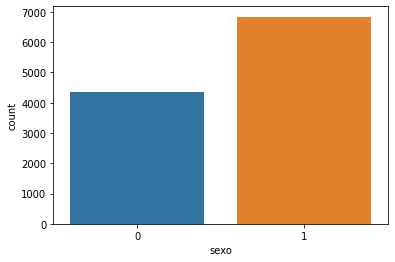

In [46]:
# crimes por sexo

sns.countplot(x='sexo', data=df_clean);

### Boletins de Ocorrência

Instrumento vital para o planejamento estratégico da polícia, o Boletim de Ocorrência deveria ser registrado sempre que ocorresse um crime ou tentativa de crime.

Será que essa é a realidade de São Paulo?

Aqui, vemos que a maioria das pessoas registra boletins de ocorrência. Entretanto, o número, e a proporção em relação ao total desse dataset, de pessoas que não registram boletim de ocorrência ainda é mais alto que o ideal.


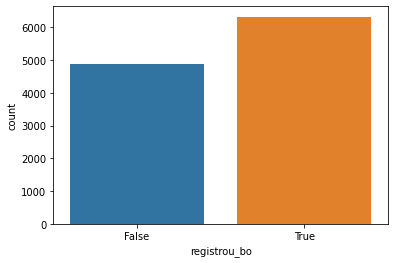

In [47]:
# registro de boletins de ocorrencia

sns.countplot(x='registrou_bo', data=df_clean);

### Criminalidade por bairros
De acordo com nossos dados, podemos ver que as regiões com maior número de crimes são:

* São Paulo (Área central)
* Consolação
* Vila Mariana

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


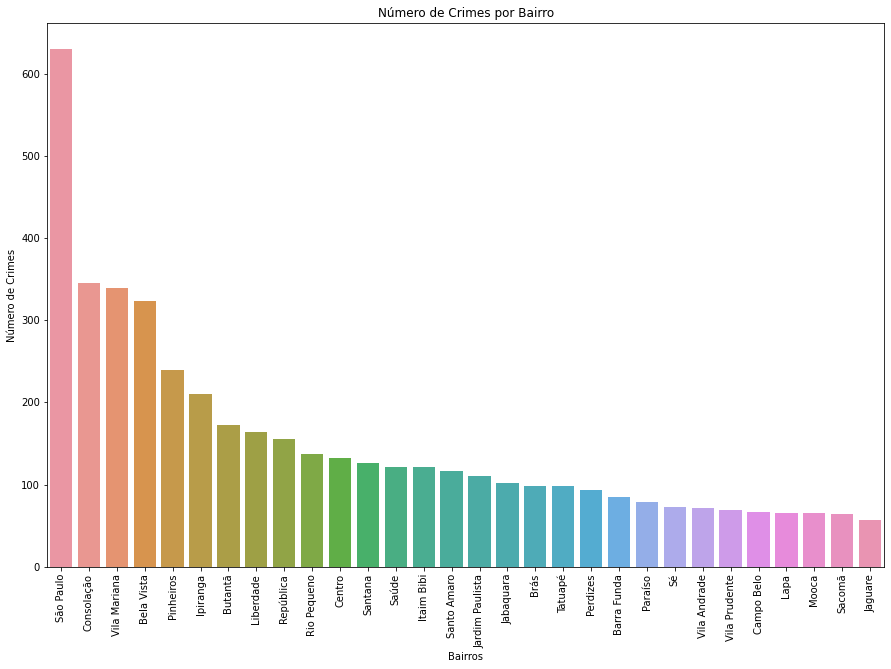

In [51]:
# coletando e ordenando os valores para cada bairro
bairros = df_clean.bairro.value_counts().sort_values(ascending = False).iloc[0:30]

# criando a visualização

fig, ax = plt.subplots(figsize=(15,10))  #ajustando o grafico na tela
sns.barplot(bairros.index, bairros.values);

# definindo o título do eixo y
plt.ylabel('Número de Crimes')
# definindo o título do eixo x
plt.xlabel('Bairros')
# definindo o título da visualização
plt.title('Número de Crimes por Bairro')
#rotacionando a legenda do eixo x para melhor vizualização
plt.xticks(rotation=90);
#plotando a visualização
plt.show()

### Tendência da criminalidade

Com o advento da internet, e ampliação dos meios de divulgação de informação, temos maior acesso aos dados, e às histórias. Mas será que maior facilidade de acesso às informações significa um aumento nos casos?

Ao mesmo tempo, as tecnologias e estratégias de segurança também foram atualizadas. Qual será o resultado dessa ecuação?

A visualização abaixo nos mostra algumas informações interessantes, como:

* Pico de criminalidade no ano de 2014
* Diminuição na criminalidade em 2015
* Volta do crescimento entre 2015 e 2017

Aqui, precisamos considerar que não temos como garantir que os dados foram adquiridos com precisão ao longo destes anos. As diferenças muito grandes levantam sinais de alerta.

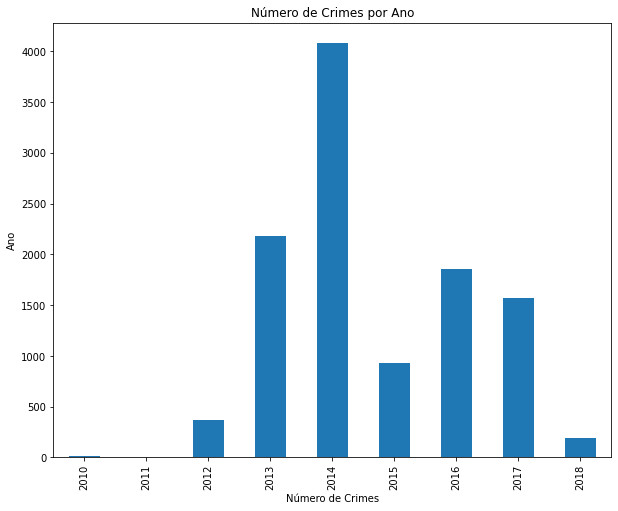

In [53]:
# índice de crimes por ano
# criando a visualização

fig, ax = plt.subplots(figsize=(10,8))

# agrupando os dados por ano e plotando um grafico de barras
df_clean.groupby([df_clean.index.year]).size().plot(kind='bar')

# definindo o título do eixo y
plt.ylabel('Ano')
# definindo o título do eixo x
plt.xlabel('Número de Crimes')
# definindo o título da visualização
plt.title('Número de Crimes por Ano')
#plotando a visualização
plt.show()

Exportanto agora o dataset limpo

In [54]:
# exportar o dataset limpo
df_clean.to_csv('criminalidade_sp.csv', index=False)

### **OUTLIERS**

Removendo os Outliers das Latitudes e Longitudes



In [55]:
# erros de lançamento em lat/lon

# analisando com describe
df_clean[['latitude', 'longitude']].describe()

,latitude,longitude
count,11196.000000,11196.000000
mean,-23.565957,-46.637630
std,0.388178,0.462609
min,-24.241930,-52.173376
25%,-23.606828,-46.696568
50%,-23.567145,-46.648936
75%,-23.541547,-46.607699
max,-0.013911,0.004533


In [56]:
excluir = df_clean[(df_clean.latitude < -26.6) | (df_clean.latitude > -22)].index
df_clean = df_clean.drop(index=excluir)

In [57]:
excluir = df_clean[(df_clean.longitude < -53) | (df_clean.longitude > -46)].index
df_clean = df_clean.drop(index=excluir)

In [60]:
df_clean[['latitude', 'longitude']].describe()

,latitude,longitude
count,11171.000000,11171.000000
mean,-23.574476,-46.643425
std,0.065713,0.108731
min,-24.241930,-52.173376
25%,-23.606902,-46.696571
50%,-23.567359,-46.648978
75%,-23.541700,-46.607959
max,-22.224190,-46.075681


In [ ]:
# exportar o dataset limpo
df_clean.to_csv('criminalidade_sp_2.csv', index=False)